In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100


In [14]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data-images/"

gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [15]:
#przygotuj siec konwolucyjna i wyświetl wykresy
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 4)         580       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [16]:
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, callbacks=[es])

Epoch 1/100
31/31 [==============================] - 3s 68ms/step - loss: 0.6726 - accuracy: 0.5971 - val_loss: 0.6467 - val_accuracy: 0.5708
Epoch 2/100
31/31 [==============================] - 2s 70ms/step - loss: 0.5154 - accuracy: 0.7788 - val_loss: 0.4615 - val_accuracy: 0.7458
Epoch 3/100
31/31 [==============================] - 3s 81ms/step - loss: 0.3513 - accuracy: 0.8567 - val_loss: 0.3048 - val_accuracy: 0.9042
Epoch 4/100
31/31 [==============================] - 2s 59ms/step - loss: 0.2999 - accuracy: 0.8712 - val_loss: 0.3676 - val_accuracy: 0.8542
Epoch 5/100
31/31 [==============================] - 2s 54ms/step - loss: 0.2543 - accuracy: 0.9003 - val_loss: 0.2459 - val_accuracy: 0.9125
Epoch 6/100
31/31 [==============================] - 3s 81ms/step - loss: 0.1877 - accuracy: 0.9283 - val_loss: 0.1826 - val_accuracy: 0.9417
Epoch 7/100
31/31 [==============================] - 2s 70ms/step - loss: 0.1714 - accuracy: 0.9398 - val_loss: 0.1736 - val_accuracy: 0.9292
Epoch 

In [17]:
img, label = validation_dataset.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 93ms/step


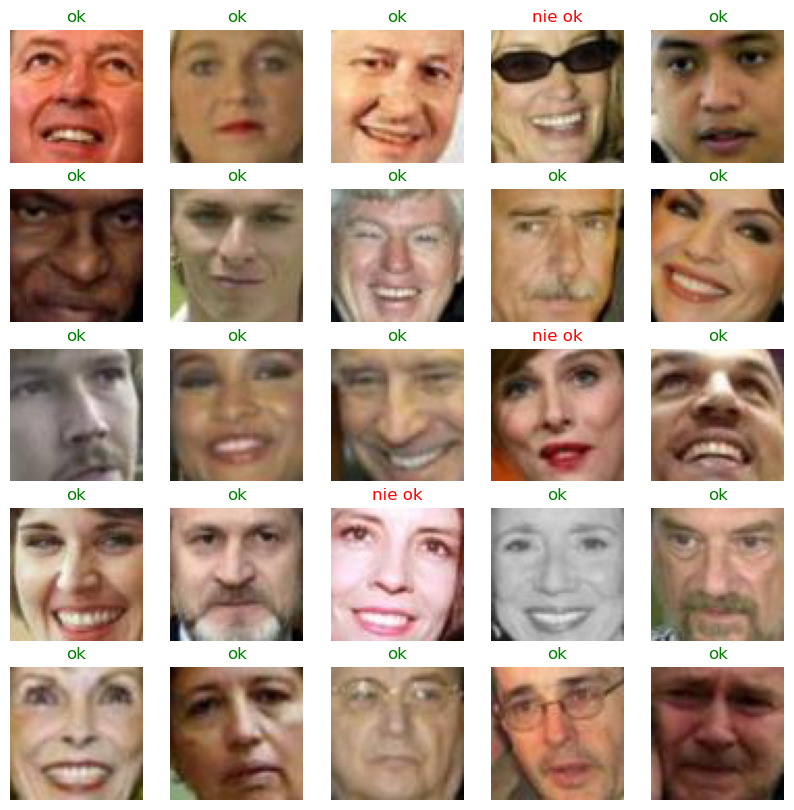

In [18]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    

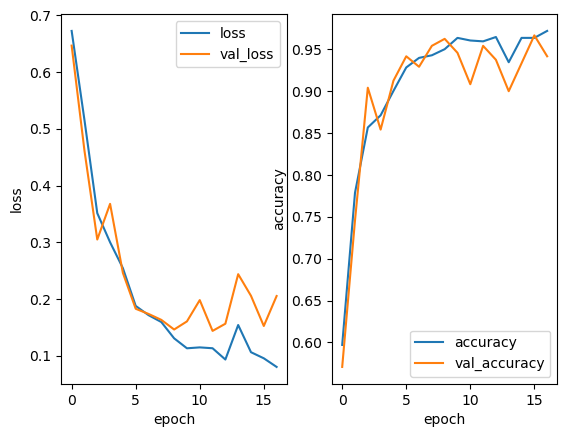

<Figure size 640x480 with 0 Axes>

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()